# importando base de dados

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('./data/Preços_de_casas.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [4]:
#Tirando a coluna Id que não é relevante para o preço da casa
dados = dados.drop(columns='Id')

## Correlação

In [5]:
corr = dados.corr()
corr['preco_de_venda'] #Correlaao das colunas com o preco de venda

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

# Gerando grafico Area X Preço

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Text(0, 0.5, 'preco de venda')

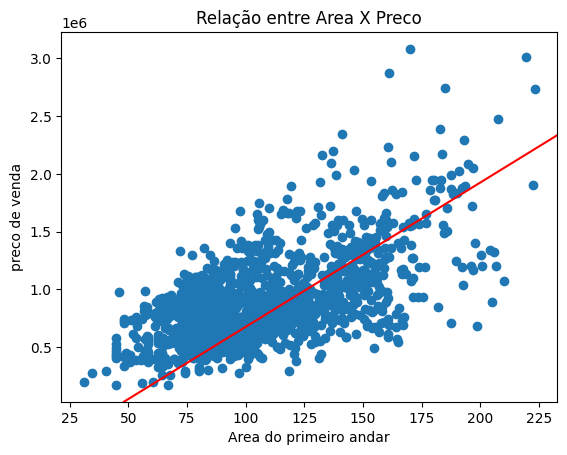

In [7]:
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1=(66, 250000), xy2=(190, 1800000), color='red')
plt.title('Relação entre Area X Preco')
plt.xlabel('Area do primeiro andar')
plt.ylabel('preco de venda')

# Dividindo conjunto de dados em treino e teste

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y = dados['preco_de_venda'] #Coluna procurada
x = dados.drop(columns='preco_de_venda') #Colunas base

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=156)

In [11]:
#Criando DataFrame de treino com as variaveis da separação
df_train = pd.DataFrame(data=x_train)
df_train['preco_de_venda'] = y_train

# Criando modelo de regressão

In [12]:
from statsmodels.formula.api import ols

In [13]:
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()

In [14]:
modelo_0.params
#Previsão para quando a area do primeiro andar é 0
#Quanto a area do primeiro andas aumenta no preco

Intercept              134993.933169
area_primeiro_andar      7015.644645
dtype: float64

In [15]:
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     620.4
Date:                Thu, 26 Jun 2025   Prob (F-statistic):          5.23e-107
Time:                        09:30:24   Log-Likelihood:                -14089.
No. Observations:                1006   AIC:                         2.818e+04
Df Residuals:                    1004   BIC:                         2.819e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             1.35e+05   3

In [16]:
#O r² mostra a "porcentagem" da influencia da coluna sobre o resultado
#A coluna area_primeiro_andar influencia em 38% o resultado de preco_de_venda
modelo_0.rsquared

0.3819067783391361

# Residuos/Desvio Padrão

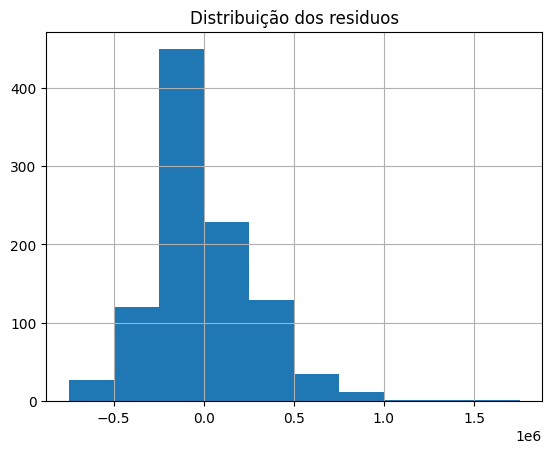

In [17]:
modelo_0.resid.hist()
plt.title("Distribuição dos residuos")
plt.show()

In [18]:
y_predict = modelo_0.predict(x_test)

In [19]:
from sklearn.metrics import r2_score

In [20]:
print(f"R²: {r2_score(y_test, y_predict)}")

R²: 0.37514539323448437


# Grafico das Colunas X Preco de Venda

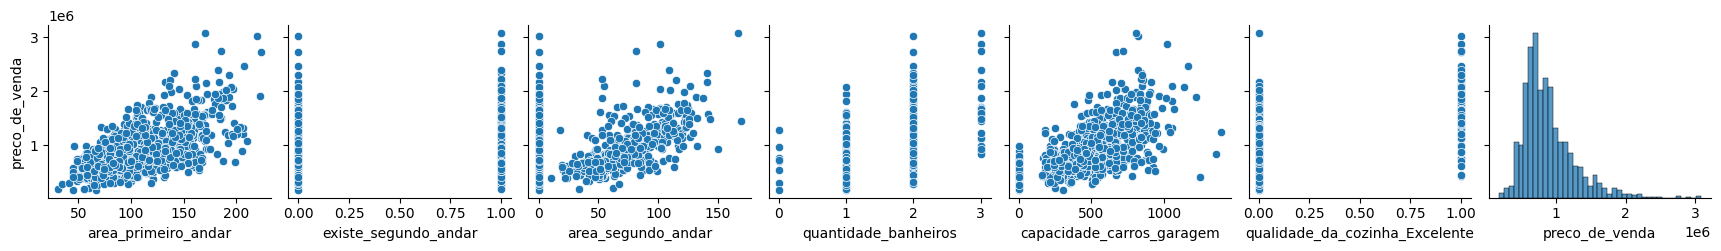

In [21]:
sns.pairplot(dados, y_vars='preco_de_venda')


# Adicionando fatores aos modelos

In [22]:
import statsmodels.api as sm

In [23]:
x_train = sm.add_constant(x_train)

In [24]:
x_train.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [25]:
modelo_1 = sm.OLS(y_train, x_train).fit()
modelo_2 = sm.OLS(y_train, x_train.drop(columns='area_segundo_andar')).fit()
modelo_3 = sm.OLS(y_train, x_train.drop(columns=['area_segundo_andar', 'capacidade_carros_garagem'])).fit()

In [26]:
print(modelo_1.summary())
print(modelo_2.summary())
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     459.6
Date:                Thu, 26 Jun 2025   Prob (F-statistic):          3.19e-283
Time:                        09:30:25   Log-Likelihood:                -13665.
No. Observations:                1006   AIC:                         2.734e+04
Df Residuals:                     999   BIC:                         2.738e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [27]:
print('R²')
print('Modelo 0: ', modelo_0.rsquared)
print('Modelo 1: ', modelo_1.rsquared)
print('Modelo 2: ', modelo_2.rsquared)
print('Modelo 3: ', modelo_3.rsquared)

R²
Modelo 0:  0.3819067783391361
Modelo 1:  0.7340684752988615
Modelo 2:  0.7051712423258686
Modelo 3:  0.6465215756959116


# Fazendo previsão e usando R²

In [31]:
x_test = sm.add_constant(x_test)

In [35]:
predict_3 = modelo_3.predict(x_test.drop(columns=['area_segundo_andar', 'capacidade_carros_garagem']))

In [36]:
modelo_3.rsquared

0.6465215756959116

In [37]:
print('R²: ', r2_score(y_test, predict_3))

R²:  0.6539020359177957


# prevendo o preco de 1 casa

In [38]:
novo_imovel = pd.DataFrame({
    'const': [1],
    'area_primeiro_andar': [120],
    'existe_segundo_andar': [1],
    'quantidade_banheiros': [2],
    'qualidade_da_cozinha_Excelente': [0]
})

In [39]:
modelo_0.predict(novo_imovel['area_primeiro_andar'])

0    976871.290534
dtype: float64

In [41]:
modelo_3.predict(novo_imovel)[0]

1130701.7422183175

# Prevendo o preço de varias casas

In [50]:
novas_casa = pd.read_csv('data/Novas_casas.csv', sep=';')
novas_casa.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [51]:
novas_casa = novas_casa.drop(columns='Casa')
novas_casa = sm.add_constant(novas_casa)

In [54]:
for x in range(0, 10):
    print(modelo_3.predict(novas_casa)[x])

1764757.3059878908
1904803.2658225985
1578449.60017196
2240351.702225074
1615516.5754013457
1254906.879428938
1394952.8392636457
1565419.7224554894
981461.0116317725
1668398.7070608113


# Multicolinearidade

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']
             
explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [57]:
vif_1 = pd.DataFrame()
vif_1['variavel'] = explicativas_1

vif_1['vif'] = [variance_inflation_factor(x_train[explicativas_1], i) for i in range(len(explicativas_1))]

In [58]:
vif_1

,variavel,vif
0,const,20.655420
1,area_primeiro_andar,2.129814
2,existe_segundo_andar,7.562859
3,area_segundo_andar,7.610129
4,quantidade_banheiros,1.749724
5,capacidade_carros_garagem,1.545223
6,qualidade_da_cozinha_Excelente,1.155044


In [59]:
vif_3 = pd.DataFrame()
vif_3['variavel'] = explicativas_3

vif_3['vif'] = [variance_inflation_factor(x_train[explicativas_3], i) for i in range(len(explicativas_3))]

vif_3

,variavel,vif
0,const,18.907275
1,area_primeiro_andar,1.889359
2,existe_segundo_andar,1.615818
3,quantidade_banheiros,1.553495
4,qualidade_da_cozinha_Excelente,1.136411


# Analise dos Residuos

In [72]:
y_previsto_train = modelo_3.predict(x_train[explicativas_3])

In [73]:
fig = px.scatter(x=y_previsto_train, y= y_train, title='Previsão X Real', 
                 labels={'x': 'Preço previsto', 'y': 'Preço real'})

fig.show()

In [74]:
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

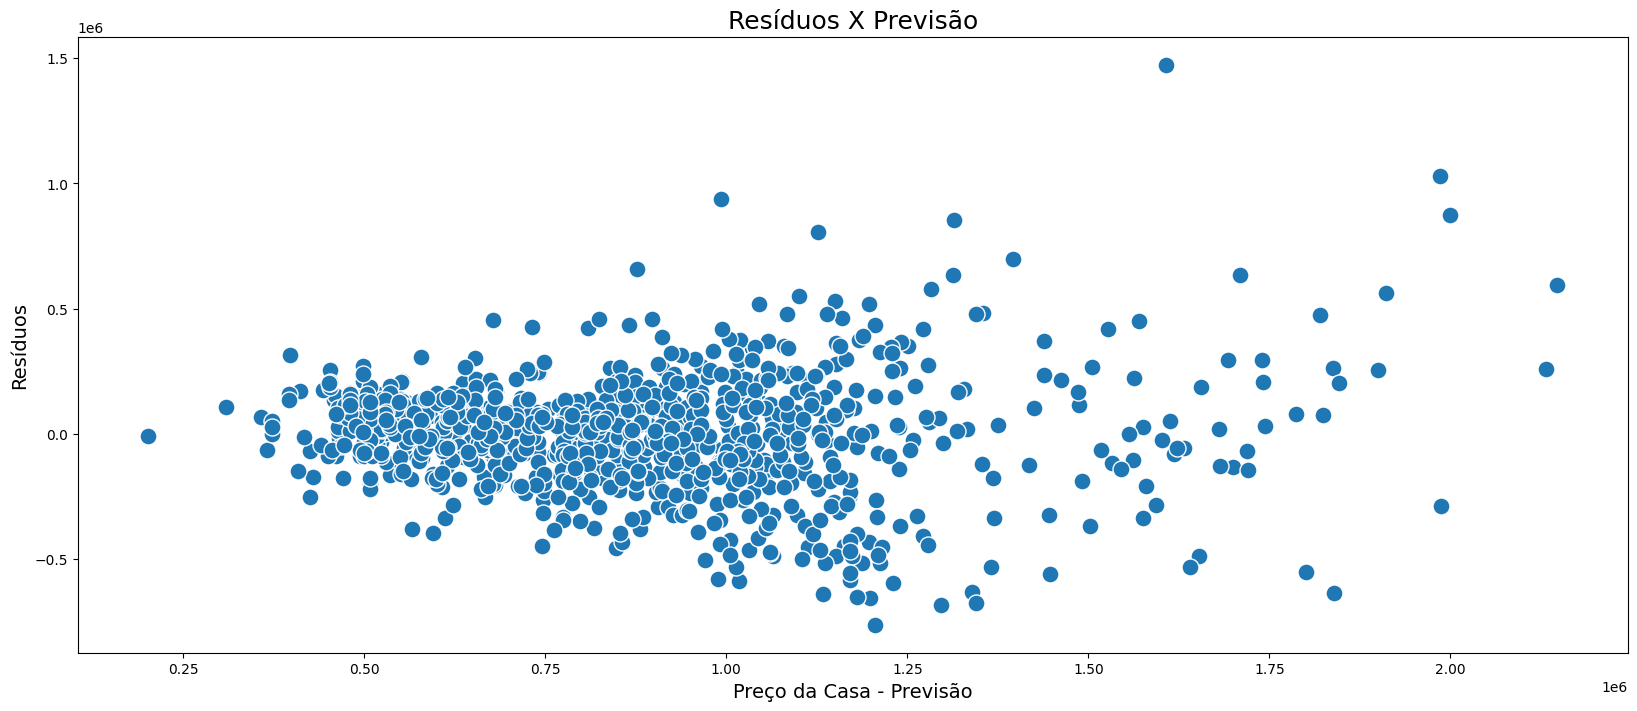

In [75]:
ax = sns.scatterplot(x= y_previsto_train, y= residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax